In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [2]:
df = pd.read_csv('path.csv')

df['x'] = (df[' distance / mm'] * np.sin(df[' angle gyro / °'] * np.pi/180)).cumsum()
df['y'] = (df[' distance / mm'] * np.cos(df[' angle gyro / °'] * np.pi/180)).cumsum()

df

,time / s,distance / mm,angle motors / °,angle gyro / °,x,y
0,0.000,0.000,0,0.000000,0.000000,0.000000
1,32.977,2.485,0,1.008403,0.043734,2.484615
2,55.218,1.637,-133,-129.075630,-1.227093,1.452739
3,64.779,0.405,-228,-187.563025,-1.173789,1.051262
4,80.466,1.037,-306,-266.218487,-0.139046,0.982870
5,87.947,0.242,-249,-246.050420,0.082118,0.884635
6,109.449,1.517,-427,-424.537815,-1.287534,1.536816
7,115.058,0.049,-489,-485.042017,-1.327652,1.508681
8,135.749,1.443,-319,-324.705882,-0.493925,2.686454
9,146.798,0.597,-261,-266.218487,0.101776,2.647080


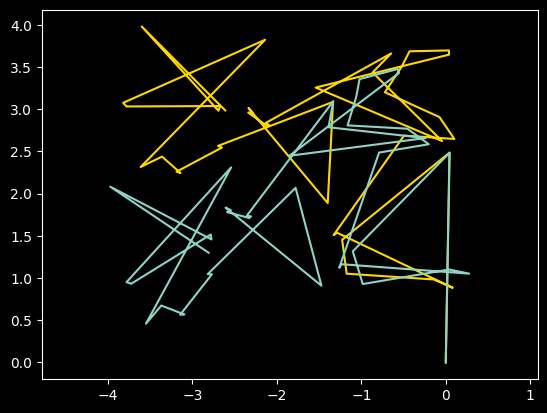

In [7]:
df['angle error'] = df[' angle gyro / °'] * 1.05
df['xe'] = (df[' distance / mm'] * np.sin(df['angle error'] * np.pi/180)).cumsum()
df['ye'] = (df[' distance / mm'] * np.cos(df['angle error'] * np.pi/180)).cumsum()

plt.plot(df['x'], df['y'], color='gold')
plt.plot(df['xe'], df['ye'])
plt.axis('equal')

# plt.savefig('path.png', transparent=True)

([<matplotlib.axis.YTick at 0x258f0cb4d10>,
 [Text(0, -720, '−720'),
  Text(0, -540, '−540'),
  Text(0, -360, '−360'),
  Text(0, -180, '−180'),
  Text(0, 0, '0')])

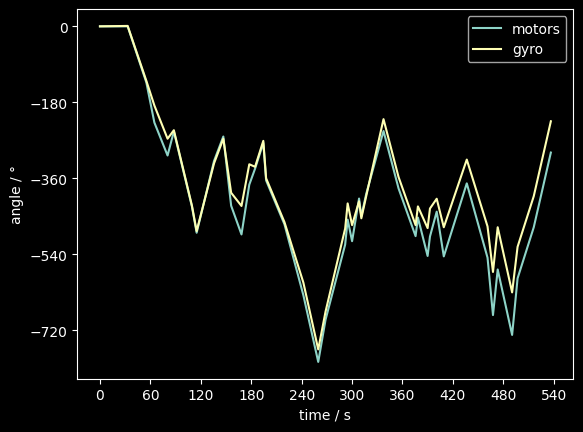

In [4]:
plt.plot(df['time / s'], df[' angle motors / °'], label = 'motors')
plt.plot(df['time / s'], df[' angle gyro / °']  , label = 'gyro')
plt.legend()
plt.xlabel('time / s')
plt.ylabel('angle / °')
plt.xticks([x*60  for x in range(0,10)])
plt.yticks([x*180 for x in range(-4,1)])

# plt.savefig('angles.png', transparent=True)

(-5.0, 35.0)

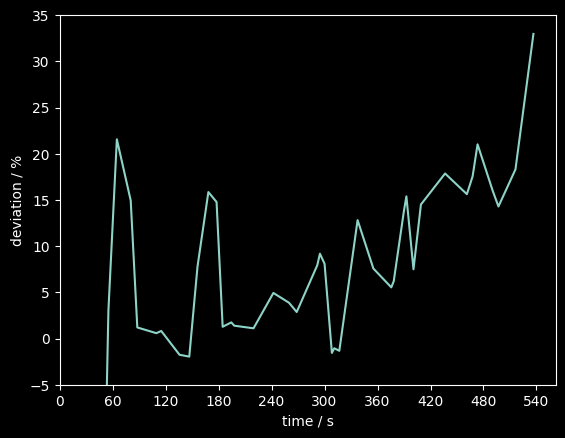

In [21]:
plt.plot(df['time / s'], (df[' angle motors / °'] / df[' angle gyro / °'] - 1)*100 )
plt.xlabel('time / s')
plt.ylabel('deviation / %')
plt.xticks([x*60  for x in range(0,10)])
plt.ylim(-5,35)